<h1 style="text-align:center;text-decoration: underline">Astronomy 350 Midterm Project #3</h1>

Prof. Quimby <br>
Spring 2025 <br>
**Due March 28 at 5pm**

**Student Name:** Raynell Labayog

## Background

It is a basic property of Euclidean geometry that the length of one side of a triangle can be determined from the length of another side and its two adjacent angles. This principle has been used since at least the age of Pythagoras to measure large distances when direct measurement is impractical. Leveraging the large baseline provided by the Earth's orbit around the Sun and the precise angular measurements possible with the aid of telescopes, this same geometric principle can be used to measure the distances to some of the nearest stars. 

As the Earth orbits the Sun, the apparent coordinates of a nearby star will change with respect to more distant, background sources. If we can accurately measure this parallax angle then we can directly measure the distance to such nearby stars in units of the average Earth-Sun distance.

## Assignment

Measure the distance (in parsec) to the high proper motion star from your midterm project #1 (see the list of targets below), then use $\LaTeX$ to create a journal-style paper on your work.

|Star Name                 | R.A.      | Dec.       | pmRA     | pmDec    |
| ---                      | ---       | ---        | ---      | ---      |
|EGGR372                   | 267.03330 |  +70.87664 | -1266.42 | +1108.87 |
|LHS1363                   |  33.55234 |   -3.96211 |  +509.30 |  -156.27 |
|LHS252                    | 130.33387 |  +59.49735 |  -260.42 | -1279.61 |
|GJ1187                    | 224.47388 |  +56.65680 |  +280.18 |  -646.68 |
|LHS546                    | 353.79359 |   -2.38906 |  +781.67 |  -841.42 |
|2MASSJ00113182+5908400    |   2.88260 |  +59.14446 |  -905.70 | -1166.81 |
|TRAPPIST-1                | 346.62237 |   -5.04140 |  +930.88 |  -479.40 |
|EGGR453                   | 343.47244 |   -6.78180 | +2485.85 |  -681.21 |

## Resources:

Parallax:
* [notes on van Altena's parallax notes](~/tutorials/parallax.notes.ipynb) <-- **Must read!**
  * van Altena's original notes: ftp://ftp.astro.yale.edu/pub/workshop/presentations/BillVanAltena_Parallaxes.pdf
  * van Altena's book on [Astrometry for Astrophysics](https://ebookcentral.proquest.com/lib/sdsu/reader.action?docID=1042413)
* [Gaia video explaining parallax](https://youtu.be/m1ZNSPrH0q8)
* [CTIOPI paper](https://ui.adsabs.harvard.edu/abs/2005AJ....129.1954J/abstract) on measuring parallaxes of nearby stars
    
Palomar Transient Factory
  * Explore the Palomar Transient Factory [(PTF) data archive](http://irsa.ipac.caltech.edu/applications/ptf/)
  * Paper [describing PTF](https://ui.adsabs.harvard.edu/#abs/2009PASP..121.1395L/abstract) 
    
Least-Squares fitting
  * Carl Heiles' [notes on least-squares fitting](http://www.ugastro.berkeley.edu/radio/2015/handout_links/lsfit_2008.pdf)
  * Application of least-squares fitting tutorial ([notebook](../tutorials/least-squares.application.ipynb), [video](http://video.sdsu.edu/nas/capture/2019/rquimbysdsu.edu/least-squares.application/least-squares.application_-_20190314_100559_6.html))
  
$\LaTeX$
 - overleaf.com [$\LaTeX$ documentation and tutorials](https://www.overleaf.com/learn/latex/Main_Page)
 - Information on the [AASTeX package](http://journals.aas.org/authors/aastex.html)
   - AASTeX paper template [available on Overleaf.com](https://www.overleaf.com/latex/templates/aastex-template-for-submissions-to-aas-journals-apj-aj-apjs-apjl-psj-rnaas/vwyggrqvhcgz) <-- **Must use!**

In [1]:
# some packages and functions you might need
from astropy.coordinates import get_sun # <-- make sure you know what this is for!
import numpy as np
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
import pickle

%matplotlib inline
import matplotlib.pyplot as plt

## Process

### Step 0

Review your work on midterm project #1.

### Step 1

Included in the assignment repo are data files compiled from [Palomar Transient Factory](http://irsa.ipac.caltech.edu/applications/ptf/)  observations of each target that give the Julian date of the observation and the observed R.A. and Dec. of the target (e.g., see the `EGGR372.dat` file). Recall you were asked to gather and plot these values in midterm project #1. Finish the code template below to load the data and verify that you can plot the motion of your target across the celestial sphere (i.e. make a plot showing R.A. vs. Dec.).

In [2]:
def load_astrometry(name):
    """
    load and return the numpy structured array stored in a data file
    
    `name` is the name of the target and *part* of the filename
    """
    
    filename = name
    return np.genfromtxt(filename, names='jd, ra, dec')

In [4]:
# use the function above to load the data for a target
name = 'EGGR453'
names = 'EGGR453.dat'
data = load_astrometry(names)

# check the shape and column names of data
data.shape

(75,)

<div class="alert alert-warning" role="alert">

**EA:** You can (and should) construct `load_astrometry` to take just the name of the star, e.g. EGGR453, rather than the filename.

</div>

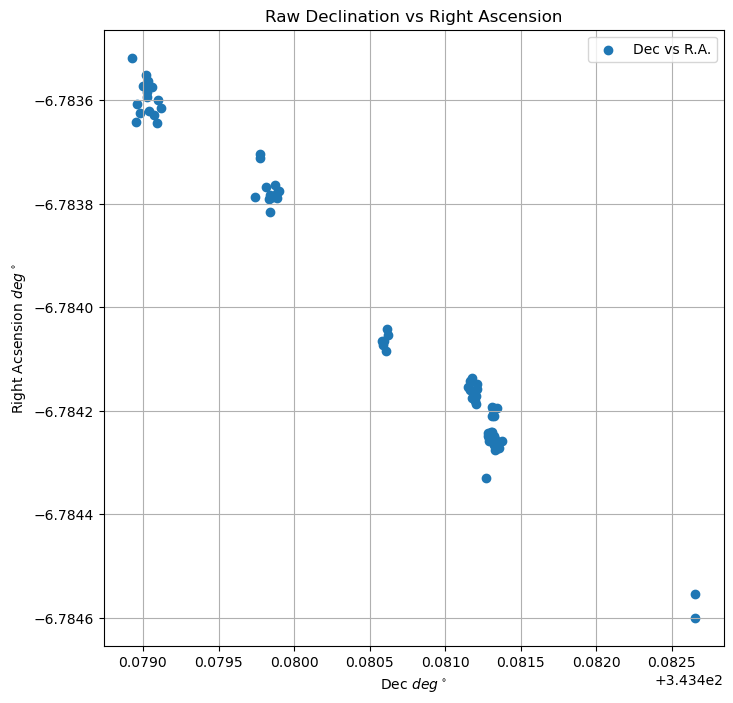

In [5]:
# plot the Dec. vs. R.A.
plt.figure(figsize=(8,8))
plt.scatter(data['ra'], data['dec'], marker='o',label = 'Dec vs R.A.')
plt.xlabel(r'Dec $deg^\circ$')
plt.ylabel(r'Right Acsension $deg^\circ$')
plt.title('Raw Declination vs Right Ascension')
plt.grid()
plt.legend()
plt.show()
#plt.savefig('Raw_DecvsRA.pdf')

<div class="alert alert-warning" role="alert">

**EA:** Consider having your RA increase from right to left as is often done.

</div>

### Step 2

Make plots showing the residual motion in R.A. and Dec. after proper motion has been removed. To do this, you will need to use the R.A. and Dec. from the table above (which are valid for the epoch J2000, which is noon on 2000 January 1 UT) as well as the supplied proper motion terms to predict R.A. and Dec. values at each of the observed epochs. Subtract these predicted values from the observed values to get the residuals, then plot these against time. 

For your benefit, the assignment repo also has a `targets.dat` file that holds the position and proper motion data for each target. These values come from [Gaia DR3](https://ui.adsabs.harvard.edu/abs/2022arXiv220800211G/abstract). The supplied `get_tinfo` function below will create a dictionary with these quantities given any valid target name.

In [6]:
 dtype = [('name', 'U32'), ('ra', float), ('dec', float), ('pmra', float), ('pmdec', float)]
tinfos = np.genfromtxt('targets.dat', dtype=dtype)
tinfos

array([('EGGR372', 267.0333 , 70.87664, -1266.42,  1108.87),
       ('LHS1363',  33.55234, -3.96211,   509.3 ,  -156.27),
       ('LHS252', 130.33387, 59.49735,  -260.42, -1279.61),
       ('GJ1187', 224.47388, 56.6568 ,   280.18,  -646.68),
       ('LHS546', 353.79359, -2.38906,   781.67,  -841.42),
       ('2MASSJ00113182+5908400',   2.8826 , 59.14446,  -905.7 , -1166.81),
       ('TRAPPIST-1', 346.62237, -5.0414 ,   930.88,  -479.4 ),
       ('EGGR453', 343.47244, -6.7818 ,  2485.85,  -681.21)],
      dtype=[('name', '<U32'), ('ra', '<f8'), ('dec', '<f8'), ('pmra', '<f8'), ('pmdec', '<f8')])

In [7]:
def get_tinfo(name):
    """
    Return a dictionary with position and proper motion data for the given target
    
    `name` is the target name (string)
    """
    
    # load the target data from the supplied target.dat file
    dtype = [('name', 'U32'), ('ra', float), ('dec', float), ('pmra', float), ('pmdec', float)]
    tinfos = np.genfromtxt('targets.dat', dtype=dtype)

    # locate the row for the requested target
    w = tinfos['name'] == name
    if w.sum() == 0:
        print('Error using get_tinfo: cannot locate target', name, '... returning!')
        return None
    row = tinfos[w][0]

    # create and return a dictionary with the target details
    tinfo = {}
    tinfo['name'] = name
    tinfo['epoch'] = Time('J2000', format='jyear_str')
    tinfo['ra'] = row['ra'] * u.deg
    tinfo['dec'] = row['dec'] * u.deg
    tinfo['pmra'] = row['pmra'] * u.mas / u.year
    tinfo['pmdec'] = row['pmdec'] * u.mas / u.year
    return tinfo    

In [8]:
# try out the supplied `get_tinfo` function
tinfo = get_tinfo(name)

# see what data tinfo contains
tinfo

{'name': 'EGGR453',
 'epoch': <Time object: scale='tt' format='jyear_str' value=J2000.000>,
 'ra': <Quantity 343.47244 deg>,
 'dec': <Quantity -6.7818 deg>,
 'pmra': <Quantity 2485.85 mas / yr>,
 'pmdec': <Quantity -681.21 mas / yr>}

In [9]:
# you will find the function template below (from midterm project #1) to be helpful
def get_target_pos(tinfo, epoch):
    """
    return a SkyCoord with the *approximate* position of the target at the given epoch.
    
    `tinfo` is a user supplied dictionary with the RA, Dec of the target, 
            the epoch for these, and the proper motion in RA and Dec.
          
    `epoch` should be supplied as a astropy.time.Time object
    """
    # determine the time difference between the requested epoch and the reference epoch
    dt = (epoch - tinfo['epoch']) / 365.25

    # convert proper motion from milliarcseconds/year to degrees/year
    pmra_deg = tinfo['pmra']/(3600*1000)
    pmdec_deg = tinfo['pmdec']/(3600*1000)
    
    # predict the target Dec. at the requested epoch
    dec = tinfo['dec'] + (pmdec_deg * dt)
    
    # predict the target R.A. at the requested epoch (be careful!)
    ra = tinfo['ra']+ (pmra_deg * dt) / np.cos(np.radians(tinfo['dec']))

    # return a SkyCoord with the predicted position of the target at the given epoch
    return SkyCoord(ra=ra, dec=dec, frame='icrs')

<div class="alert alert-warning" role="alert">

**EA:** When diving your `tinfo['pmra']` (a quantity with units) by 3600\*1000, this does not actually convert the _units_ to deg/yr, but just changes the proper motion value. You would need to use `.to(u.deg / u.yr)`.

</div>

In [10]:
# use the get_target_pos function to get the predicted R.A., Dec. positions
# for each observation epoch
#get_target_pos(tinfo, data['jd'])
jd_array = data['jd'] 

# Convert to astropy Time object
epochs = Time(jd_array, format='jd')

# Run get_target_pos for each epoch
positions = [get_target_pos(tinfo, epoch) for epoch in epochs]

# Extract RA and Dec into arrays
ra_array = [pos.ra.deg for pos in positions]
dec_array = [pos.dec.deg for pos in positions]


<div class="alert alert-warning" role="alert">

**EA:** When making `positions` and your ra and dec arrays, you do not have to use list comprehension, but simply doing `get_target_pos(tinfo, epochs)` and `pos.ra.deg` or `pos.dec.deg` works.

</div>

In [11]:
# calculate the angular difference (not coordinate difference!)
# between the observed and predicted R.A. values in arcseconds
dra = ((data['ra'] - ra_array) * np.cos(np.radians(dec_array))) * 3600  # arcsec

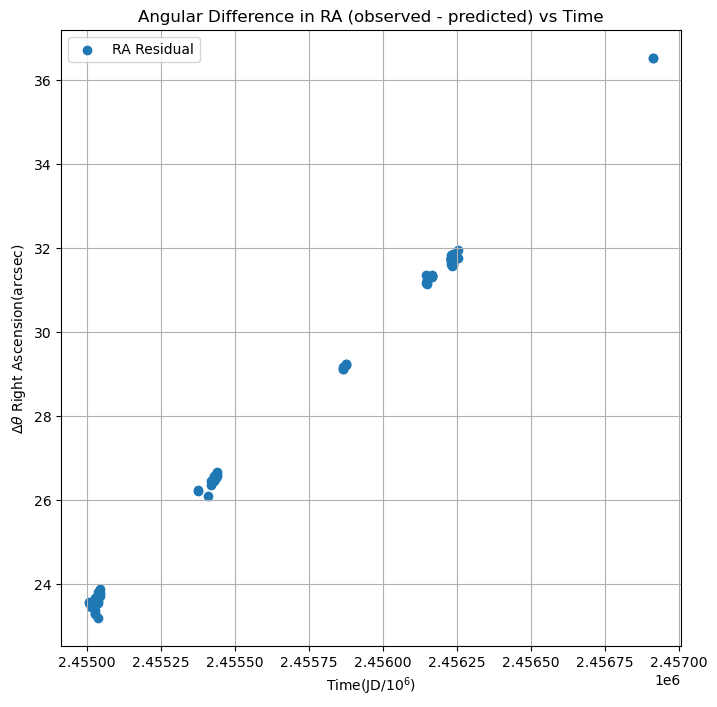

In [12]:
# plot the angular difference in R.A. (observed - predicted) vs. time
plt.figure(figsize=(8,8))
plt.scatter(data['jd'], dra, marker='o', label='RA Residual')
plt.xlabel(f"Time(JD/$10^6$)")
plt.ylabel(r'$\Delta\theta$ Right Ascension(arcsec)')
plt.title('Angular Difference in RA (observed - predicted) vs Time')
plt.legend()
plt.grid()
#plt.show()
plt.savefig('AngularDifferenceRAvsTime.pdf')

<div class="alert alert-warning" role="alert">

**EA:** Your observed - predicted differences should be much smaller, on the order of a fraction of an arcsecond.

</div>

In [13]:
# calculate the angular difference between the observed
# and predicted Dec. values in arcseconds
ddec = (data['dec'] - dec_array)*3600

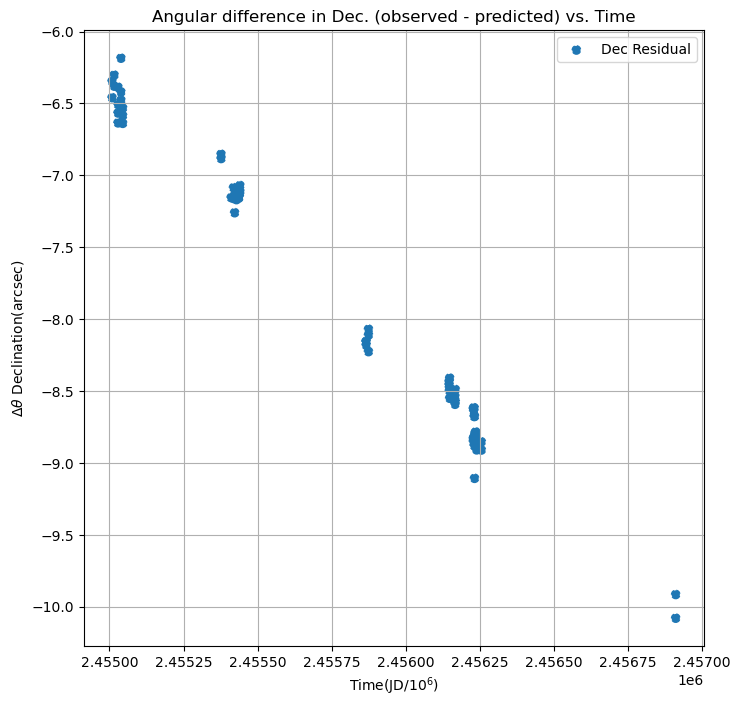

In [14]:
# plot the angular difference in Dec. (observed - predicted) vs. time
plt.figure(figsize=(8,8))
plt.scatter(data['jd'], ddec, marker='o', linestyle='--', label='Dec Residual')
plt.xlabel(f"Time(JD/$10^6$)")
plt.ylabel(r'$\Delta\theta$ Declination(arcsec)')
plt.title('Angular difference in Dec. (observed - predicted) vs. Time')
plt.legend()
plt.grid()
plt.show()
#plt.savefig('AngularDifferenceDECvsTime.pdf')

<div class="alert alert-warning" role="alert">

**EA:** Similarly, your observed - predicted plots for declination should also be on the order of a fraction of an arcsecond.

</div>

### Step 3

Complete the code template below to calculate the "parallax factors". These factors relate the parallax angle to the observed shifts in R.A. and Dec. that are due to the Earth's motion around the Sun. See van Altena's notes for the definition of these factors.

In [15]:
def get_parallax_factor(tinfo, jds):
    """
    returns the parallax factors in RA and Dec for a given target at a given set of observation times 
    
    `tinfo` is a dictionary that holds information about the target (name, R.A., Dec., etc.)
    `jds` is a numpy array that holds the Julian date (or dates!) at which the parallax factors is (are) desired
    """

    # convert jds to an astropy Time object
    epoch = Time(jds, format='jd')
    
    # compute the RA, Dec, and distance to the Sun at each epoch 
    sun = get_sun(epoch).transform_to('icrs')

    # calculate the approximate target position at each epoch
    tpos = get_target_pos(tinfo, epoch)

    # calculate the parallax factor (relative to the actual parallax) in RA and Dec
    F_ra = np.sin((sun.ra - tpos.ra).to(u.rad)) * np.cos(sun.dec)
    F_dec = np.sin(sun.dec) * np.cos(tpos.dec) - np.cos(sun.dec) * np.sin(tpos.dec) * np.cos((sun.ra - tpos.ra).to(u.rad))

    return F_ra, F_dec

<div class="alert alert-warning" role="alert">

**EA:** `get_sun` returns a SkyCoord in GCRS (Geocentric Celestial Reference System, centered at Earth's center of mass) coordinate frame, but you transform your sun coordinates to the ICRS (International Celestial Reference System, centered at _Solar System_ center of mass) coordinate frame. These are two very different reference frames and return very different answers. Since we observe from the Earth, we should remain in the GCRS frame.

</div>

<div class="alert alert-warning" role="alert">

**EA:** Your parallax factors are missing the distance to the Sun, $R$, as defined in van Altena's notes. You can acquire this distance using `sun.distance` or `sun.distance.au`.

</div>

<div class="alert alert-warning" role="alert">

**EA:** You don't need to convert the `sun.ra - tpos.ra` in your `np.sin` and `np.cos` to radians, both of those values have units associated with them and `np.sin/np.cos` takes care of any conversions with units!

</div>

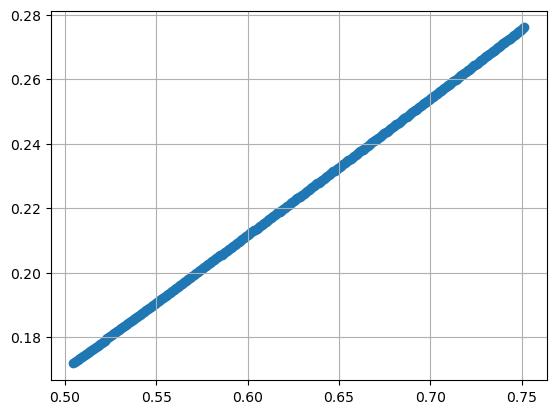

In [17]:
# test your get_parallax_factor function:
# compute the parallax factors for 365 consecutive days
start_jd=2488197.5
jds = np.arange(start_jd, start_jd + 365)
F_ra, F_dec = get_parallax_factor(tinfo, jds)

# plot these parallax factors, F_ra vs. F_dec
plt.scatter(F_ra, F_dec)
plt.grid()
plt.show()

<div class="alert alert-warning" role="alert">

**EA:** While your parallax factors have the correct "shape", they are not the correct values.

</div>

<div class="alert alert-warning" role="alert">

**EA:** Don't forget to label your axes!

</div>

### Step 4

Simultaneously fit the data for relative parallax and proper motion in RA and Dec using least-squares techniques. You may find van Altena's notes helpful for setting this up. Recall that for least-squares fitting you will need to express a system of equations in the form, $Y = Xp$. You will find the function templates below helpful in solving for the best-fit parameters.

Note: Numpy `matrix` functions do not know how to handle Astropy quantities, so you will have to **pass Numpy the values only**.

In [22]:
def get_Y(tinfo, data):
    """
    return a numpy matrix with the dependant variables in a single column
    
    `tinfo` is a dictionary that holds information about the target (name, R.A., Dec., etc.)
    `data` is a numpy structured array with `ra`, `dec`, and `jd` fields
    """
    
    RA = tinfo['ra'].to(u.deg).value
    DEC = tinfo['dec'].to(u.deg).value

    # set up the Y matrix
    Y = []
    for i in range(len(data)):
        Y.append([(data['ra'][i] - RA) * np.cos(np.radians(DEC)) * 3600])
    
    return np.matrix(Y)

In [23]:
def get_X(tinfo, jds):
    """
    return a numpy matrix with the independant variables
    
    `tinfo` is a dictionary that holds information about the target (name, R.A., Dec., etc.)
    `jds` is a numpy array that holds the Julian date (or dates!) at which the parallax factors is (are) desired
    """

    # get the parallax factors
    F_ra, F_dec = get_parallax_factor(tinfo, jds)

    # set up the X matrix
    X=[]
    dt = (jds - tinfo['epoch'].jd) / 365.25  # time difference in years
    for i in range(len(jds)):
        X.append([1, dt[i], F_ra[i].value])
    return np.matrix(X)

<div class="alert alert-warning" role="alert">

**EA:** Your X matrix does not contain any terms related to declination, including the declination parallax factors. You also would only be fitting for 3 values instead of the 5 you need.

</div>

In [25]:
def fit_model(tinfo, data):
    """
    return the best-fit model parameters and uncertainties in numpy matrices
    
    `tinfo` is a dictionary that holds information about the target (name, R.A., Dec., etc.)
    `data` is a numpy structured array with `ra`, `dec`, and `jd` fields
    """
    X = get_X(tinfo, data['jd'])
    Y = get_Y(tinfo, data)
    XT_X_inv = np.linalg.inv(X.T @ X)
    p = XT_X_inv @ X.T @ Y
    residuals = Y - X @ p
    sigma2 = (residuals.T @ residuals) / (len(Y) - X.shape[1])
    perr = np.sqrt(np.diag(XT_X_inv * sigma2.item())).reshape(-1, 1)
    
    return p, perr

In [27]:
# find the best-fit parallax and proper motion terms in the least-squares sense
p, perr = fit_model(tinfo, data)
# Print the results
print("Best-fit parameters:")
print(f"RA Offset        = {p[0,0]:.6f} ± {perr[0,0]:.6f} arcsec")
print(f"Proper Motion RA = {p[1,0]:.6f} ± {perr[1,0]:.6f} arcsec/yr")
print(f"Parallax         = {p[2,0]:.6f} ± {perr[2,0]:.6f} arcsec")

Best-fit parameters:
RA Offset        = -0.460290 ± 0.316594 arcsec
Proper Motion RA = 2.518745 ± 0.029172 arcsec/yr
Parallax         = 0.144591 ± 0.073892 arcsec


<div class="alert alert-warning" role="alert">

**EA:** And the declination terms?

</div>

### Step 5

Plot the data (R.A. vs. Dec.) with the best fit model.

In [28]:
# you will find the function template below to be helpful
def get_model_pos(tinfo, p, jds):
    """
    return the model R.A. and model Dec. values for the given model at specified times
    
    `tinfo` is a dictionary that holds information about the target (name, R.A., Dec., etc.)
    `p` is a numpy matrix that holds the model parameters in a column matrix
    `jds` is a numpy array that holds the Julian date (or dates!) at which the model values are desired
    """
    
    RA = tinfo['ra'].to(u.deg).value
    DEC = tinfo['dec'].to(u.deg).value

        # Time difference from reference epoch in years
    dt = (jds - tinfo['epoch'].jd) / 365.25

    # Get parallax factors
    F_ra, F_dec = get_parallax_factor(tinfo, jds)

    # Compute model RA and Dec in degrees
    modelra = RA + (p[0,0] + p[1,0]*dt + p[2,0]*F_ra) / (3600 * np.cos(np.radians(DEC)))
    modeldec = DEC + (p[2,0] * F_dec) / 3600

    return modelra, modeldec

<div class="alert alert-warning" role="alert">

**EA:** You did not fit for any parameters that help model the motion in declination.

</div>

<div class="alert alert-warning" role="alert">

**EA:** There is an easier way to obtain your model RA and model Dec without recomputing your parallax factors and using the whole model equation (hint: recall what $Y=Xp$ does).

</div>

In [40]:
model_dec

<Quantity [-6.78179136, -6.78179139, -6.78179142, -6.78179145, -6.78179148,
           -6.78179151, -6.78179154, -6.78179157, -6.7817916 , -6.78179163,
           -6.78179166, -6.78179169, -6.78179172, -6.78179175, -6.78179178,
           -6.78179181, -6.78179185, -6.78179188, -6.78179191, -6.78179194,
           -6.78179197, -6.781792  , -6.78179203, -6.78179206, -6.78179209,
           -6.78179212, -6.78179215, -6.78179219, -6.78179222, -6.78179225,
           -6.78179228, -6.78179231, -6.78179234, -6.78179237, -6.7817924 ,
           -6.78179244, -6.78179247, -6.7817925 , -6.78179253, -6.78179256,
           -6.78179259, -6.78179263, -6.78179266, -6.78179269, -6.78179272,
           -6.78179275, -6.78179279, -6.78179282, -6.78179285, -6.78179288,
           -6.78179291, -6.78179295, -6.78179298, -6.78179301, -6.78179304,
           -6.78179308, -6.78179311, -6.78179314, -6.78179317, -6.7817932 ,
           -6.78179324, -6.78179327, -6.7817933 , -6.78179334, -6.78179337,
           -

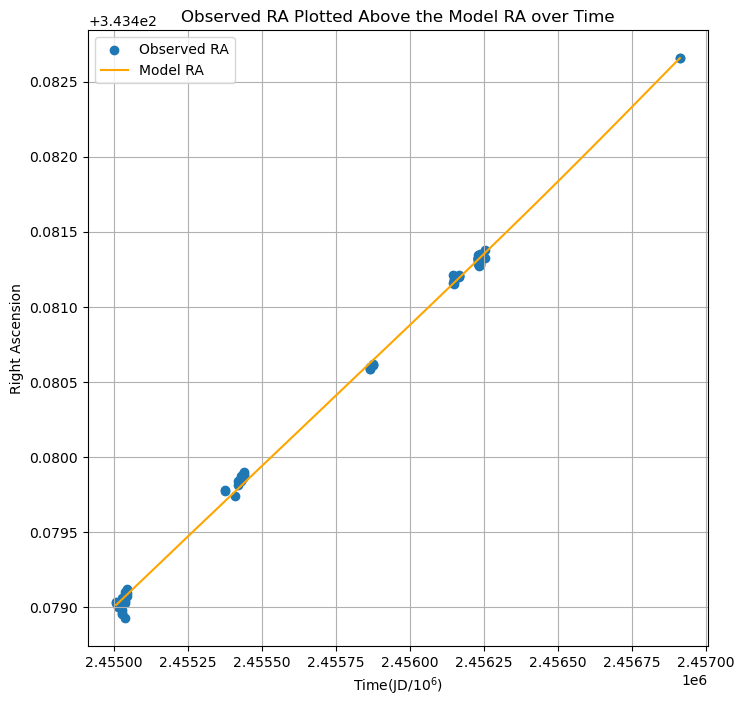

In [29]:
# calculate the predicted R.A. and Dec. values for
# 1000 epochs between the first and last observation
jds_model = np.linspace(data['jd'].min(), data['jd'].max(), 1000)
model_ra, model_dec = get_model_pos(tinfo, p, jds_model)

# plot the data with the best-fit model
plt.figure(figsize=(8,8))
plt.scatter(data['jd'], data['ra'], label='Observed RA')
plt.plot(jds_model, model_ra, label='Model RA', color='orange')

plt.xlabel(f"Time(JD/$10^6$)")
plt.ylabel('Right Ascension')
plt.title('Observed RA Plotted Above the Model RA over Time')
plt.grid()
plt.legend()
#plt.show()
plt.savefig('ObservedNModel.pdf')


<div class="alert alert-warning" role="alert">

**EA:** You have plotted RA vs time only, but you were asked to plot RA vs Dec.

</div>

### Step 6

Convert the best-fit parallax into a distance measurement (in parsecs). 

In [30]:
parallax_arcsec = p[2, 0]
distance_pc = 1 / parallax_arcsec

print(f"Distance = {distance_pc:.1f} parsecs")

Distance = 6.9 parsecs


<div class="alert alert-warning" role="alert">

**EA:** Uncertainty in the distance?

</div>

### Step 7

Present your results in an ApJ style paper that you write using $\LaTeX$. Use [Overleaf](https://www.overleaf.com/) and the [AASTeX package](https://journals.aas.org/aastex-package-for-manuscript-preparation/) (a template is [available on Overleaf](https://www.overleaf.com/latex/templates/aastex-template-for-submissions-to-aas-journals-apj-aj-apjs-apjl-psj-rnaas/vwyggrqvhcgz)) to prepare your paper. You must include figures and citations and properly reference these in the main text.

The paper should demonstrate your understanding of parallax, how measurements can be made by the least-squares fitting of models to data, and the limitations in accuracy/precision of the best-fit models due to uncertainties in the data and assumptions of the model. Sections of the paper should include:

   * *Abstract*: a concise statement of the paper's objective, key methods, main results, and impact.
   * *Introduction*: provide background information on the material covered in the paper. This section typically begins with motivation for the current work (e.g. "it is important to know X because Y, but it is hard to know X because..."). Introductions should also give the reader a guide of what is to come in later sections.
   * *Data*: explain where the data used in the paper come from and specifically point out anything about the data that may affect the precision or accuracy of the results.
   * *Analysis*: this is where you take the available data, apply the techniques discussed in the introduction, and produce new measurements. Explain how you get from the data to the measurements.
   * *Discussion/Conclusions*: what are the implications of the Analysis? Summary of what has been learned. What are the limitations of the results? What could be done to improve the results?


Additionally, the paper should have a title, list the authors who contributed, and provide references. 

<div class="alert alert-warning" role="alert">

**Notebook**
<ul>
<li> Loading Data 5/5
<li> Proper motion only model 4/5
<li> Computation of parallax factors 8/10
<li> Least-squares fitting 11/15
<li> Plotting of models and data 7/10
<li> Distance measurement 3/5
</ul>

**Report**
<ul>
<li> Title, Abstract, Latex 12/15
<li> Introduction 8/10
<li> Data 3/5
<li> Analysis 11/15
<li> Conclusions 3/5
</ul>


</div>


In [56]:
5+4+8+11+7+3+12+8+3+11+3

75

## All Done?

Submit this notebook and the PDF of your report using `git`. 